In [1]:
cd /content/drive/MyDrive/Colab Notebooks/NLP/Sentiment_Analysis

/content/drive/MyDrive/Colab Notebooks/NLP/Sentiment_Analysis


In [ ]:
%ls

 best2.pth             'Machine Learning.ipynb'      tfidf_NaiveBayes.pkl
 best3.pth              NaiveBayes.pkl               tfidf_SVM.pkl
 best.pth               PhoBERT_base_transformers/   tfidf_vectorizer_tiki.pkl
 data/                  Preprocess.ipynb             vectorizer_tiki.pkl
 data_processing/       runs/                        vncorenlp/
'Deep Learning.ipynb'   SVM.pkl
 LinearSVM.pkl          tfidf_LinearSVM.pkl


# Import Libraries

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load

In [3]:
df=pd.read_csv("data/data_done.csv",  encoding='utf8').iloc[:,1:]
print(df.head())
train_text = list(df.loc[:,'sentiment'])
train_labels = list(df.loc[:,'label'])
print(train_text[:10])
print(train_labels[:10])

   label                                          sentiment
0      0                chất_son không hài_lòng làm môi khô
1      0  treo đầu dê bán thịt chó à kêu hàng thái_lan m...
2      1                         màu không đúng với thưc tế
3      2                      sản_phẩm giống mô_tả giao rất
4      2  hàng rất đẹp siêu dễ_thương luôn phần sau hơi ...
['chất_son không hài_lòng làm môi khô', 'treo đầu dê bán thịt chó à kêu hàng thái_lan mà nhận về lại là hàng indonexia là', 'màu không đúng với thưc tế', 'sản_phẩm giống mô_tả giao rất', 'hàng rất đẹp siêu dễ_thương luôn phần sau hơi dơ một_tí mong cửa_hàng lần sau cẩn thẩn hơn nhưng_mà không sao hàng đẹp là oketiki giao hàng cũng nhanh', 'đơn hàng của mình bị mở ra từ trước mình rất thất_vọng về dịch_vụ giao hàng lần này mình thật_sự rất khó_chịu khi ai đó xem đồ của mình', 'khăn bên trong bị mốc cửa_hàng bán khăn chất_lượng quá kém khăn như_vậy dùng không được vui_lòng hướng_dẫn hoàn hàng', 'ngon trong tầm giá tốc_độ thì đọc ghi đ

# Utils

In [4]:
def show_classification_report(y_predict, target_names):
  Classification_report = classification_report(y_test,y_predict, target_names=target_names)
  print(Classification_report)

In [5]:
def show_confusion_matrix(cm, algorithm):
  group_names = ["True Negative","False Neutral","False Positive","False Negative","True Neutral","False Positive","False Negative","False Neutral","True Positive"]

  group_counts = ["{0:0.0f}".format(value) for value in
                  cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(3,3)
  ax= plt.subplot()
  ax.set_title(algorithm+' Confusion Matrix  ');
  sns.heatmap(cm, annot=labels,ax=ax, fmt='', cmap='Blues')

  ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

  plt.xlabel('Predicted')
  plt.ylabel('Data')

In [6]:
def show_accuracy(classifier):
  accuracy=classifier.score(X_test,y_test)
  print('Accuracy',int(round(accuracy*100)),'%')
  print('Coefficient of determination: %.2f'% r2_score(y_test,y_predict))

In [7]:
target_names=['Negative','Neutral' ,'Positive']

# Count Vectorizer

In [8]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(train_text)

In [ ]:
pickle.dump(vectorizer, open('vectorizer_tiki.pkl','wb'))
loaded_vectorizer = pickle.load(open('vectorizer_tiki.pkl', 'rb'))

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X, train_labels, test_size=0.2, random_state=123)

In [10]:
print(X_train.shape)
print(X_test.shape)

(18706, 9624)
(4677, 9624)


## Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train, y_train)
y_predict=NB_classifier.predict(X_test)

In [12]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.74      0.75      0.74      1717
     Neutral       0.59      0.58      0.59      1472
    Positive       0.80      0.78      0.79      1488

    accuracy                           0.71      4677
   macro avg       0.71      0.71      0.71      4677
weighted avg       0.71      0.71      0.71      4677



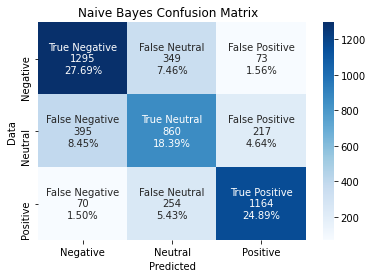

In [13]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'Naive Bayes')

In [14]:
show_accuracy(NB_classifier)

Accuracy 71 %
Coefficient of determination: 0.44


In [15]:
pickle.dump(NB_classifier, open('NaiveBayes.pkl','wb'))

## SVM


In [16]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_predict=svc.predict(X_test)

In [18]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.70      0.83      0.76      1717
     Neutral       0.64      0.55      0.59      1472
    Positive       0.85      0.79      0.82      1488

    accuracy                           0.73      4677
   macro avg       0.73      0.72      0.72      4677
weighted avg       0.73      0.73      0.73      4677



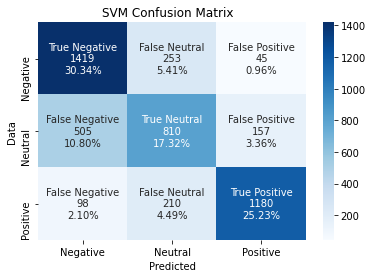

In [19]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'SVM')

In [20]:
show_accuracy(svc)

Accuracy 73 %
Coefficient of determination: 0.47


In [ ]:
pickle.dump(svc, open('SVM.pkl','wb'))

## Linear SVC

In [21]:
from sklearn.svm import LinearSVC
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [22]:
y_predict=linearsvc.predict(X_test)

In [23]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.69      0.73      0.71      1717
     Neutral       0.57      0.53      0.55      1472
    Positive       0.79      0.79      0.79      1488

    accuracy                           0.69      4677
   macro avg       0.69      0.69      0.69      4677
weighted avg       0.69      0.69      0.69      4677



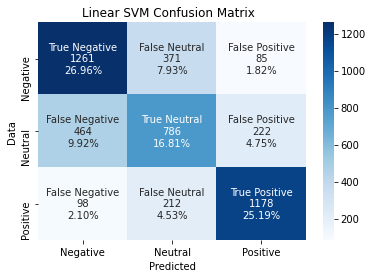

In [24]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'Linear SVM')

In [25]:
show_accuracy(linearsvc)

Accuracy 69 %
Coefficient of determination: 0.37


In [ ]:
pickle.dump(linearsvc, open('LinearSVM.pkl','wb'))

# TFIDF Vectorizer

In [26]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(train_text)

In [ ]:
pickle.dump(vectorizer, open('tfidf_vectorizer_tiki.pkl','wb'))
loaded_vectorizer = pickle.load(open('tfidf_vectorizer_tiki.pkl', 'rb'))

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X, train_labels, test_size=0.2, random_state=123)

## Naive Bayes

In [28]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train, y_train)
y_predict=NB_classifier.predict(X_test)

In [29]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.68      0.80      0.74      1717
     Neutral       0.60      0.48      0.54      1472
    Positive       0.79      0.78      0.78      1488

    accuracy                           0.69      4677
   macro avg       0.69      0.69      0.69      4677
weighted avg       0.69      0.69      0.69      4677



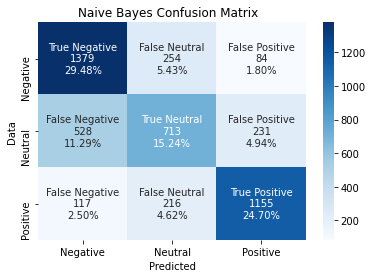

In [30]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'Naive Bayes')

In [31]:
show_accuracy(NB_classifier)

Accuracy 69 %
Coefficient of determination: 0.36


In [ ]:
pickle.dump(NB_classifier, open('tfidf_NaiveBayes.pkl','wb'))

## SVC

In [32]:
svc = SVC()
svc.fit(X_train, y_train)
y_predict=svc.predict(X_test)

In [33]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.71      0.82      0.76      1717
     Neutral       0.64      0.56      0.60      1472
    Positive       0.86      0.80      0.83      1488

    accuracy                           0.73      4677
   macro avg       0.74      0.73      0.73      4677
weighted avg       0.73      0.73      0.73      4677



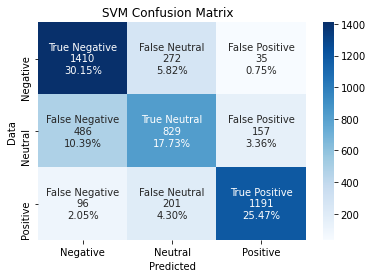

In [34]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'SVM')

In [35]:
show_accuracy(svc)

Accuracy 73 %
Coefficient of determination: 0.49


In [ ]:
pickle.dump(svc, open('tfidf_SVM.pkl','wb'))

## Linear SVM

In [36]:
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
y_predict=linearsvc.predict(X_test)

In [37]:
show_classification_report(y_predict, target_names)

              precision    recall  f1-score   support

    Negative       0.70      0.76      0.73      1717
     Neutral       0.60      0.54      0.56      1472
    Positive       0.81      0.81      0.81      1488

    accuracy                           0.70      4677
   macro avg       0.70      0.70      0.70      4677
weighted avg       0.70      0.70      0.70      4677



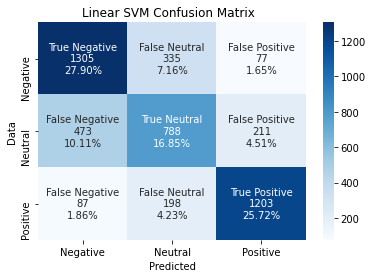

In [38]:
cm=confusion_matrix(y_test,y_predict)
show_confusion_matrix(cm,'Linear SVM')

In [39]:
show_accuracy(linearsvc)

Accuracy 70 %
Coefficient of determination: 0.41


In [ ]:
pickle.dump(linearsvc, open('tfidf_LinearSVM.pkl','wb'))